# Библиотека Lifelines

###***По материалам ноутбука, который был продемонстрирован на вебинаре "Применение анализа выживаемости для оценки оттока клиентов", ведущий вебинара Лаврентий Данилов, youtube-канал Karpov.Cources***

In [1]:
%%capture
!pip install lifelines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines import NelsonAalenFitter

In [3]:
df = pd.read_csv('./data/telco_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Dictionary
* customerID: customer ID
* gender: whether the customer is a male or a female
* SeniorCitizen: whether the customer is a senior citizen or not (1, 0)
* Partner: whether the customer has a partner or not (Yes, No)
* Dependents: whether the customer has dependents or not (Yes, No)
* tenure: number of months the customer has stayed with the company
* PhoneService: whether the customer has a phone service or not (Yes, No)
* MultipleLines: whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: the contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: the customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: the amount charged to the customer monthly
* TotalCharges: the total amount charged to the customer
* Churn: whether the customer churned or not (Yes or No)

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
df['TotalCharges'] = df['TotalCharges'].fillna(value=df['TotalCharges'].median())

In [9]:
cat_cols = [i for i in df.columns if df[i].dtype == object]
cat_cols.remove('customerID')

In [10]:
durations = df['tenure']
event_observed = df['Churn']

In [11]:
km = KaplanMeierFitter()

In [12]:
km.fit(durations, event_observed, label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 7043 total observations, 5174 right-censored observations>

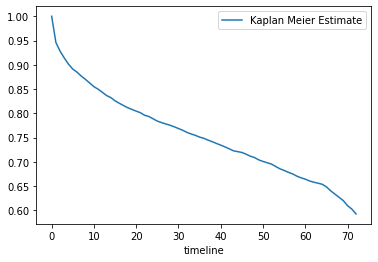

In [13]:
# Функция выживаемости
km.survival_function_.plot()

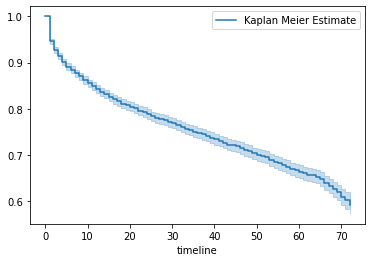

In [14]:
# Функция выживаемости с доверительными интервалами для вероятности
km.plot()

In [15]:
naf = NelsonAalenFitter()

In [16]:
naf.fit(durations,event_observed=event_observed)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 7043 total observations, 5174 right-censored observations>

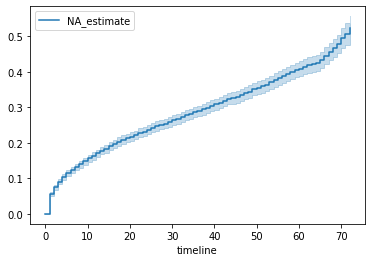

In [17]:
#Функция угрозы
naf.plot()

In [18]:
kmf = KaplanMeierFitter()

In [19]:
T = df['tenure']
E = df['Churn']

In [20]:
groups = df['Contract']

In [21]:
ix1 = (groups == 'Month-to-month')
ix2 = (groups == 'Two year')
ix3 = (groups == 'One year')

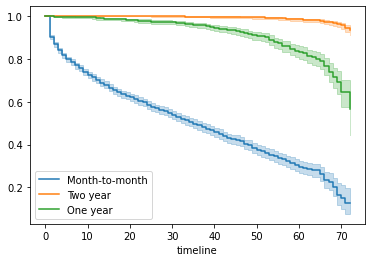

In [22]:
kmf.fit(T[ix1],E[ix1],label='Month-to-month')
ax = kmf.plot()
kmf.fit(T[ix2],E[ix2],label='Two year')
ax1 = kmf.plot(ax = ax)
kmf.fit(T[ix3],E[ix3],label='One year')
ax2 = kmf.plot(ax=ax1)

In [23]:
list_col = ['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']

In [24]:
df_r = df.loc[:,list_col]

In [25]:
df_r.head()

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [26]:
df_dummy = pd.get_dummies(df_r, drop_first=True)

In [27]:
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [28]:
cph = CoxPHFitter()

In [29]:
cph.fit(df_dummy, 'tenure',event_col = 'Churn')

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [30]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15182.39
         time fit was run = 2021-12-17 16:52:55 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
MonthlyCharges                   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
SeniorCitizen                     0.40       1.49       0.06             0.29             0.50                 1.33                 1.66
gender_Male                      -0.01       0.99       0.05            -0.10             0.08                 0.90                 1.08
Partner_Yes                      -0.81       0.45       0.05            -0.92            -0.70                 0.40                 0.50
Dependents_Yes                   -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
PhoneService_Yes                  0.69       2.00       0.10             0.49             0.90                 1.63                 2.45
StreamingTV_No internet service  -2.10       0.12       0.13            -2.36            -1.84                 0.09                 0.16
StreamingTV_Yes                  -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93

                                     z      p   -log2(p)
covariate                                               
MonthlyCharges                   -6.13 <0.005      30.06
SeniorCitizen                     7.16 <0.005      40.15
gender_Male                      -0.23   0.82       0.29
Partner_Yes                     -14.93 <0.005     164.98
Dependents_Yes                   -5.21 <0.005      22.37
PhoneService_Yes                  6.65 <0.005      34.96
StreamingTV_No internet service -15.79 <0.005     184.09
StreamingTV_Yes                  -3.10 <0.005       9.03
---
Concordance = 0.71
Partial AIC = 30380.78
log-likelihood ratio test = 941.30 on 8 df
-log2(p) of ll-ratio test = 654.95

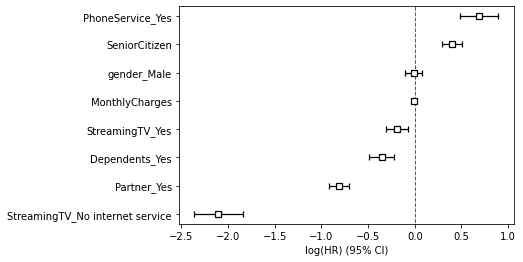

In [31]:
cph.plot()

In [32]:
tr_rows = df_dummy.iloc[5:10, 2:]

In [33]:
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


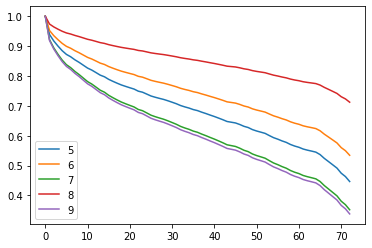

In [34]:
cph.predict_survival_function(tr_rows).plot()